**Invasión de la planta *Leonotis nepetifolia* en Mesoamérica**

Proyecto del curso "Python para Ciencia de Datos"


Estudiantes:
* Ana Susana Estrada Márquez
* Randall Hidalgo Sánchez
* Vanessa Elizabeth Villacís Astúa

**Introducción**

La biodiversidad se encuentra bajo constante amenaza por factores como la degradación, fragmentación y destrucción de los ecosistemas naturales por parte del ser humano, la introducción de especies exóticas (EE), la sobreexplotación de especies, el cambio climático global y la propagación de enfermedades (MEA, 2005). Dentro de estos factores, se considera que las especies exóticas son la segunda amenaza más importante causante de la reducción del número de especies en todo el mundo, solo superada por la pérdida de los ecosistemas naturales (MEA, 2005; Mendoza y Koleff, 2014). Además, las especies invasoras contribuyen a la inestabilidad económica y social al deteriorar los recursos naturales y los servicios ambientales (Pimentel et al., 2000; Asner et al., 2008).

*Leonotis nepetifolia* (L.) R.Br. (Lamiaceae) es una planta invasora originaria de África, introducida como ornamental (Piedra et al.,2005). Se ha reportado como invasora en América, Asia y Oceanía (Díaz-Segura et al., 2020). Es capaz de desplazar a especies nativas por su capacidad para formar poblaciones grandes y densas en los sitios de invasión, además de ser hospedera de virus que ocasionan enfermedades en cultivos de importancia económica (Díaz-Segura et al., 2020). Asimismo, se ha documentado su presencia en países como México, en donde sus flores vistosas potencia su uso como plantas de ornato, medicinales y melíferas (Vibrans, 2009). Algunos estudios mencionan que *L. nepetifolia* está asociada a sitios con perturbación antropogénica como terrenos cultivados, senderos en bosques o márgenes de arroyos, vertederos de basura, entre otros (Villaseñor & Espinosa-García, 1998; Iwarsson y Harvey, 2003; Rzedowski, 2006).

De esta manera, en el presente proyecto se conocerá el patrón de distribución de *Leonotis nepetifolia* (L.) R.Br. en Mesoamérica en diferentes periodos de tiempo con él con el propósito de identificar áreas de alta densidad y expansión reciente de la especie y que puedan ser susceptibles a su invasión. Para ello se utlizarán herramientas de ciencia de datos como Pandas y Geopandas, las cuales han mostrado ser útiles en este tipo de estudios (de Groot et al., 2024). Otras librerias de importancia incluyen Matplotlib (Hunter, 2007). Esta libreria ha utilizada previamente en el estudio de plantas invasoras e incluso para observar la distancia genética de distintas poblaciones (Gibbons et al., 2017; Piccinno et al., 2024).

**Justificación**

Los impactos ecológicos que causan las especies invasoras pueden modificar los ciclos biogeoquímicos (Asner y Vitousek, 2005), la estructura de los niveles tróficos (Vitousek, 1990), transmitir enfermedades e incluso cambiar la estructura genética de las poblaciones de especies nativas mediante la hibridación (OTA, 1993). Lo que conlleva a la extinción de especies nativas (Arriaga et al., 2004; Ehrenfeld, 2010; Lock- wood et al., 2013; Barrios-Caballero et al., 2014). *Leonotis nepetifolia* es una especie  invasora en varias partes del mundo, y en México, considerada de alto riesgo (CONABIO, 2016; CABI, 2018). No obstante, son relativamente escasos los estudios a nivel mundial, por lo que es necesario conocer los patrones de distribución en diferentes períodos de tiempo.



In [ ]:
# Cargar librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

La base de datos se obtuvo de la pagina del Sistema Global de Información sobre Biodiversidad (GBIF.org). Esta red recopila y hace disponible información sobre las distintas especies que existen. La base de datos se puede descargar aquí: https://www.gbif.org/occurrence/download?taxon_key=4924659. El archivo incluye registros tanto de herbarios y muestras de museo como observaciones almacenadas en iNaturalist, entre otros.

In [ ]:
# Cargar la base de datos.
dir = "/content/Leonotis_nepetifolia.csv"
df = pd.read_csv(dir, sep='\t')

# Revisar la estructura de la base y el tipo de datos con los que cuenta.
df.dtypes

gbifID                                int64
datasetKey                           object
occurrenceID                         object
kingdom                              object
phylum                               object
class                                object
order                                object
family                               object
genus                                object
species                              object
infraspecificEpithet                 object
taxonRank                            object
scientificName                       object
verbatimScientificName               object
verbatimScientificNameAuthorship     object
countryCode                          object
locality                             object
stateProvince                        object
occurrenceStatus                     object
individualCount                     float64
publishingOrgKey                     object
decimalLatitude                     float64
decimalLongitude                

In [ ]:
df.shape # 50 columnas, 11508 filas

(11508, 50)

Reducir la base de datos con la que se va a trabajar

In [ ]:
# Seleccionar variables que podrían ser de utilidad
df.columns
seleccionar = ["kingdom", "phylum", "class", "order", "family", "genus", "species", "countryCode",
 "locality", "stateProvince", "occurrenceStatus", "decimalLatitude", "decimalLongitude",
 "eventDate", "day", "month", "year", "basisOfRecord", "institutionCode",
 "collectionCode"]
df = df[seleccionar]


# Remover duplicados
df2 = df.drop_duplicates(["decimalLatitude", "decimalLongitude"])
df2.shape  # quedan 7391 observaciones


(7391, 20)

In [ ]:
# Se va a trabajar en Mesoamérica (y Colombia)
df2 = df[(df["countryCode"] == "MX") | (df["countryCode"] == "BZ") | (df["countryCode"] == "CO") |
         (df["countryCode"] == "CR") | (df["countryCode"] == "HN") | (df["countryCode"] == "SV") |
         (df["countryCode"] == "GT") | (df["countryCode"] == "NI") | (df["countryCode"] == "PA") |
         (df["countryCode"] == "DO")]

In [ ]:
# Identificar observaciones sin información (NA's).

df2.isna().sum()
# 375 observaciones no poseen coordenadas. Además, 47 observaciones carecen del año.
# Estas observaciones se van a eliminar.

kingdom                0
phylum                 0
class                  0
order                  0
family                 0
genus                  0
species                0
countryCode           14
locality            5803
stateProvince        394
occurrenceStatus       0
decimalLatitude        1
decimalLongitude       1
eventDate             95
day                  211
month                130
year                 102
basisOfRecord          0
institutionCode     1059
collectionCode       981
dtype: int64

In [ ]:
# Algunas observaciones sin información sobre las coordenadas

df2[df2["decimalLongitude"].isna()].head(5)

,kingdom,phylum,class,order,family,genus,species,countryCode,locality,stateProvince,occurrenceStatus,decimalLatitude,decimalLongitude,eventDate,day,month,year,basisOfRecord,institutionCode,collectionCode
24,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Lamiaceae,Leonotis,Leonotis nepetifolia,CO,NaN,NaN,PRESENT,NaN,NaN,NaN,NaN,NaN,NaN,PRESERVED_SPECIMEN,K,Herbarium
145,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Lamiaceae,Leonotis,Leonotis nepetifolia,MX,Ahualulco de Mercado,Jalisco,PRESENT,NaN,NaN,1965-07-12,12.0,7.0,1965.0,PRESERVED_SPECIMEN,UConn,CONN
146,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Lamiaceae,Leonotis,Leonotis nepetifolia,MX,Mexico,NaN,PRESENT,NaN,NaN,1984-04-24,24.0,4.0,1984.0,PRESERVED_SPECIMEN,E,E
2231,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Lamiaceae,Leonotis,Leonotis nepetifolia,MX,Noroeste de Mexico; Sinaloa: Mazatlán Municipa...,NaN,PRESENT,NaN,NaN,1926-12,NaN,12.0,1926.0,PRESERVED_SPECIMEN,MeiseBG,BR
2344,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Lamiaceae,Leonotis,Leonotis nepetifolia,CO,NaN,Antioquia,PRESENT,NaN,NaN,1989-05-22,22.0,5.0,1989.0,PRESERVED_SPECIMEN,COL,Tropicos


In [ ]:
# Eliminar filas con valores vacíos en alguna coordenada o el año.
df2 = df2.dropna(subset=["decimalLongitude", "decimalLatitude", "year"])
df2.shape  # Finalmente, quedan 2926 observaciones

(2926, 20)

In [ ]:
df2.head(6)

,kingdom,phylum,class,order,family,genus,species,countryCode,locality,stateProvince,occurrenceStatus,decimalLatitude,decimalLongitude,eventDate,day,month,year,basisOfRecord,institutionCode,collectionCode
35,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Lamiaceae,Leonotis,Leonotis nepetifolia,MX,NaN,Hidalgo,PRESENT,20.642538,-98.830958,2014-05-13T11:08:10,13.0,5.0,2014.0,HUMAN_OBSERVATION,iNaturalist,Observations
36,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Lamiaceae,Leonotis,Leonotis nepetifolia,MX,NaN,Guerrero,PRESENT,18.752206,-99.679288,2014-04-20T13:28:41,20.0,4.0,2014.0,HUMAN_OBSERVATION,iNaturalist,Observations
37,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Lamiaceae,Leonotis,Leonotis nepetifolia,MX,NaN,Oaxaca,PRESENT,16.791952,-96.674667,2014-04-18T14:02:53,18.0,4.0,2014.0,HUMAN_OBSERVATION,iNaturalist,Observations
38,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Lamiaceae,Leonotis,Leonotis nepetifolia,MX,NaN,Distrito Federal,PRESENT,19.321656,-99.192077,2014-03-19T15:03:24,19.0,3.0,2014.0,HUMAN_OBSERVATION,iNaturalist,Observations
39,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Lamiaceae,Leonotis,Leonotis nepetifolia,MX,NaN,Distrito Federal,PRESENT,19.321813,-99.192871,2014-03-19T15:13:43,19.0,3.0,2014.0,HUMAN_OBSERVATION,iNaturalist,Observations
40,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Lamiaceae,Leonotis,Leonotis nepetifolia,MX,NaN,Distrito Federal,PRESENT,19.321673,-99.193076,2014-03-19T15:12:15,19.0,3.0,2014.0,HUMAN_OBSERVATION,iNaturalist,Observations


<Axes: ylabel='paises'>

<Figure size 1000x500 with 0 Axes>

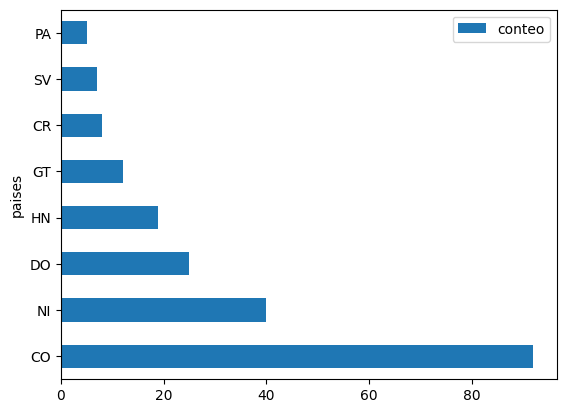

In [ ]:
# Graficación
df3 = df2[(df2["countryCode"] != "MX")] # se eliminó, para visualizar, MX porque la cantidad de observaciones es muy alta (2500+)

# Cantidad de observaciones por sitio.

#paises = pd.DataFrame(df2["countryCode"].value_counts().rename_axis('paises').reset_index(name='conteo')) # Este incluye México
paises = pd.DataFrame(df3["countryCode"].value_counts().rename_axis('paises').reset_index(name='conteo'))

plt.figure(figsize=(10,5))
paises.plot.barh(x="paises", y="conteo")

<Axes: xlabel='anos'>

<Figure size 1000x500 with 0 Axes>

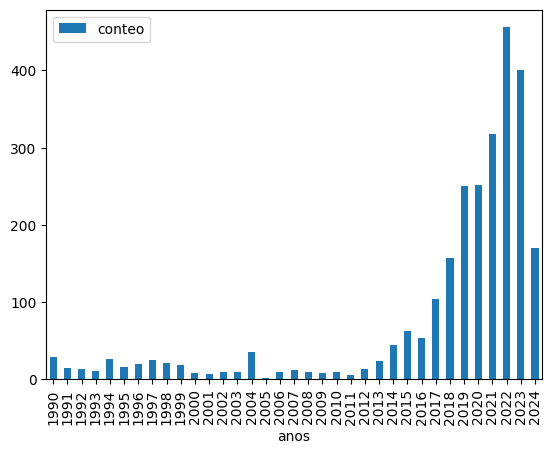

In [ ]:
# Cantidad de observaciones por año. A partir de 1990.
anos = pd.DataFrame(df2["year"].value_counts().rename_axis('anos').reset_index(name='conteo'))
anos = anos[anos["anos"]>=1990].sort_values(by="anos",  ascending=True)
anos["anos"] = anos["anos"].astype(int)


plt.figure(figsize=(10,5))
anos.plot.bar(x="anos", y="conteo")

# A partir de 2013 ocurre un aumento considerable en la cantidad de regristros

[Text(0, 0, 'Observación Humana'), Text(1, 0, 'Especimen preservado')]

<Figure size 1000x500 with 0 Axes>

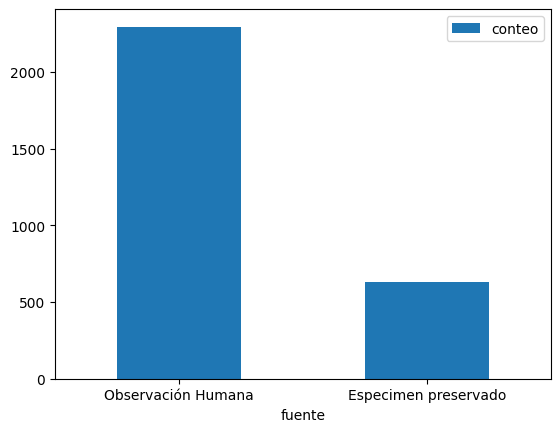

In [ ]:
# De donde provienen los datos?
registros = pd.DataFrame(df2["basisOfRecord"].value_counts().rename_axis('fuente').reset_index(name='conteo'))

plt.figure(figsize=(10,5))
registros.plot.bar(x="fuente", y="conteo").set_xticklabels(["Observación Humana", "Especimen preservado"], rotation=0)

# La gran mayoría de registros son observaciones humanas, obtenidas principalmente de aplicaciones con iNaturalist
# Resaltándose la importancia de proyectos del tipo "Ciencia Ciudadana"

<ipython-input-33-4c2d0fda0b2c>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(89.34722222222221, 0.5, 'Latitud')

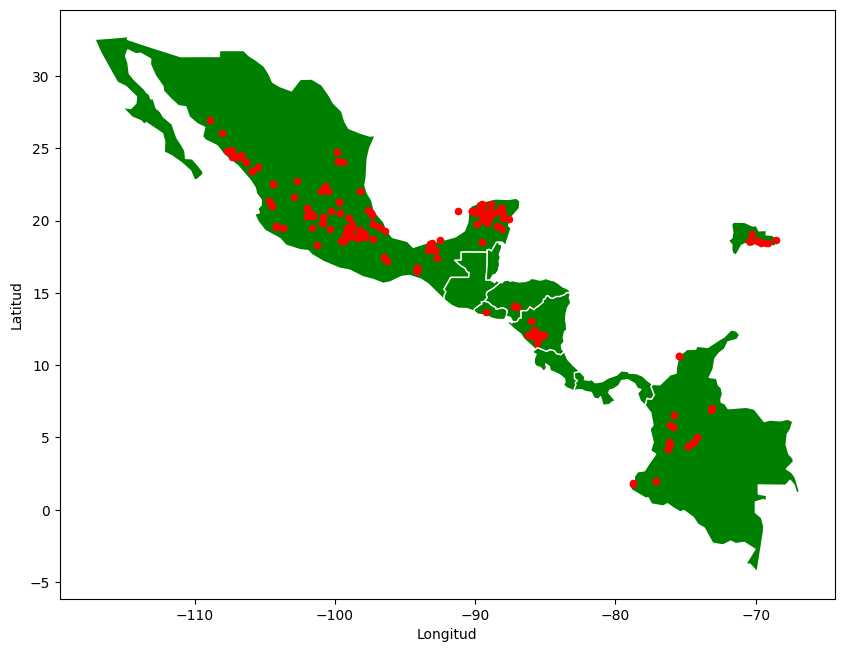

In [ ]:
# Creación de mapas.

# Una observación contiene 0, 0 en latitud y longitud. Se va a eliminar para mapear.
df2 = df2[df2["decimalLongitude"]!=0]


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Utilizar únicamente los países de América
america = world[(world["continent"] == "North America") | (world["continent"] == "South America")]

america = world[(world["iso_a3"] == "MEX") | (world["iso_a3"] == "BLZ") | (world["iso_a3"] == "COL") |
         (world["iso_a3"] == "CRI") | (world["iso_a3"] == "HND") | (world["iso_a3"] == "SLV") |
         (world["iso_a3"] == "GTM") | (world["iso_a3"] == "NIC") | (world["iso_a3"] == "PAN") |
         (world["iso_a3"] == "DOM")]


decada_80 = df2[(df2["year"]>=1980) & (df2["year"]<1990)]
decada_90 = df2[(df2["year"]>=1990) & (df2["year"]<2000)]
decada_2000 = df2[(df2["year"]>=2000) & (df2["year"]<2010)]
decada_2010 = df2[df2["year"]>=2010]


# graficar ocurrencias durante la decada de 1980.
graf = america.plot(figsize=(10, 8), edgecolor="white", linewidth=1, color="green")
decada_80.plot(ax=graf, x="decimalLongitude", y="decimalLatitude", kind="scatter", color="red")
graf.set_xlabel("Longitud")
graf.set_ylabel("Latitud")

Text(89.34722222222221, 0.5, 'Latitud')

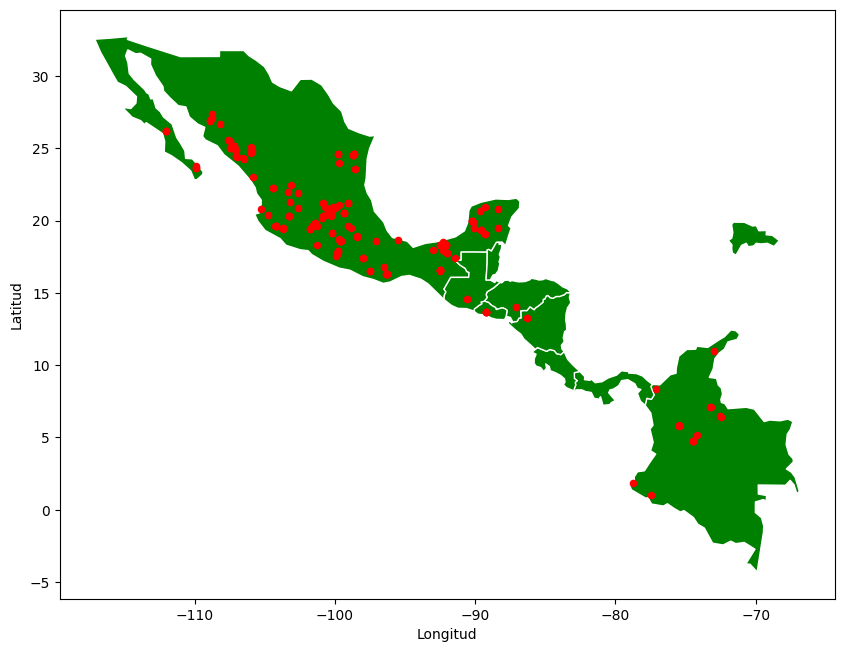

In [ ]:
# graficar ocurrencias durante la decada de 1990.
graf = america.plot(figsize=(10, 8), edgecolor="white", linewidth=1, color="green")
decada_90.plot(ax=graf, x="decimalLongitude", y="decimalLatitude", kind="scatter", color="red")
graf.set_xlabel("Longitud")
graf.set_ylabel("Latitud")

Text(89.34722222222221, 0.5, 'Latitud')

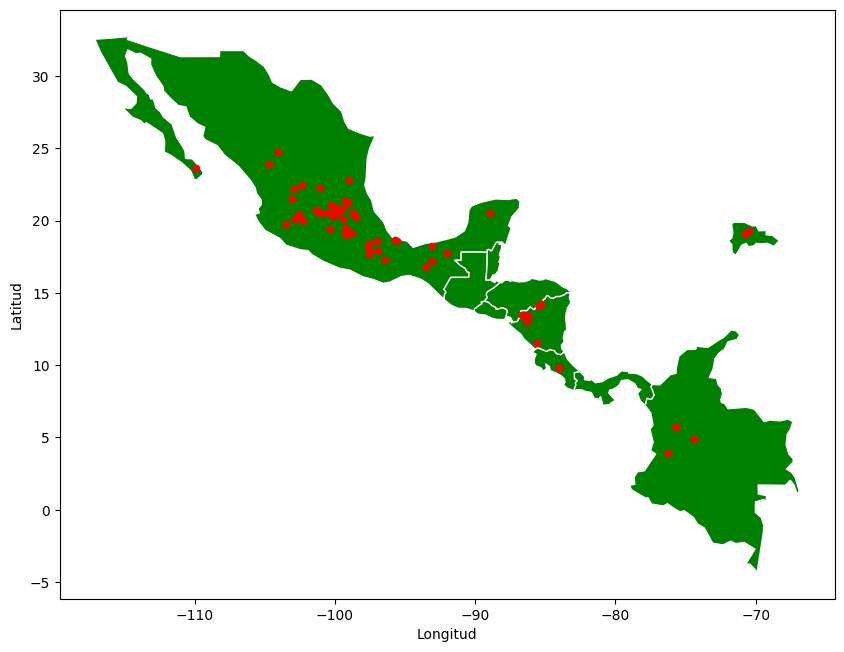

In [ ]:
# Ocurrencias luego del año 2000 hasta el 2010

graf = america.plot(figsize=(10, 8), edgecolor="white", linewidth=1, color="green")
decada_2000.plot(ax=graf, x="decimalLongitude", y="decimalLatitude", kind="scatter", color="red")
graf.set_xlabel("Longitud")
graf.set_ylabel("Latitud")

Text(89.34722222222221, 0.5, 'Latitud')

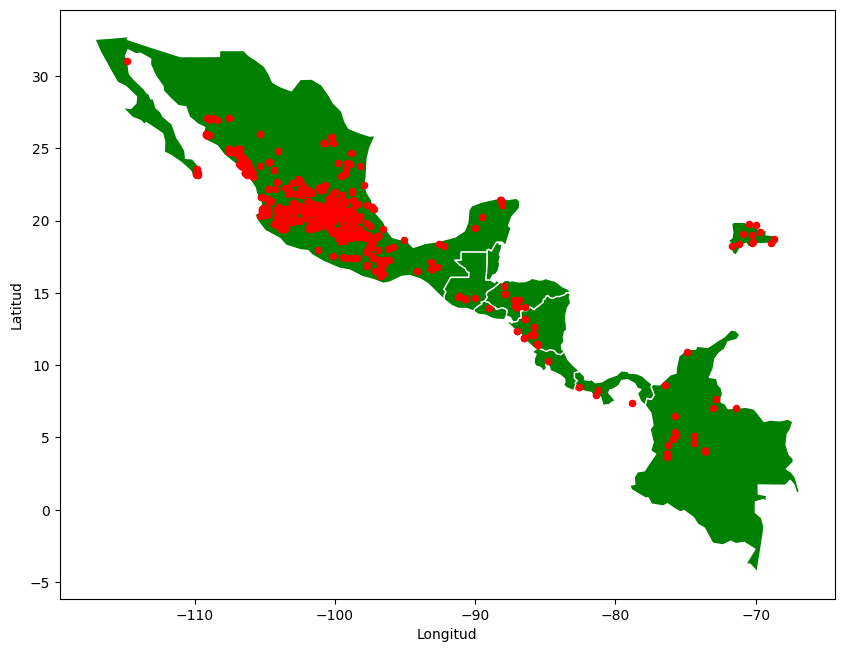

In [ ]:
# Ocurrencias luego del año 2010 hasta la actualidad

graf = america.plot(figsize=(10, 8), edgecolor="white", linewidth=1, color="green")
decada_2010.plot(ax=graf, x="decimalLongitude", y="decimalLatitude", kind="scatter", color="red")
graf.set_xlabel("Longitud")
graf.set_ylabel("Latitud")

**Conclusiones**

Del total de registros de *Leonotis nepetifolia* descargados de GBIF (11,508), se realizó un primer filtro de información con ayuda de Pandas, eliminando con ello aproximadamente 36% de los datos con coordenadas duplicadas. Por lo tanto, estas herramientas de ciencia de datos facilitan el manejo, revisión y limpieza de grandes bases de datos sobre biodiversidad, como los empleados en el presente proyecto.

De la región mesoamericana analizada, el país con mayor número de registros en las diferentes décadas analizadas, fue México, seguido de Colombia y Nicaragua. El país con menor número de registros fue Panamá.

El periodo de mayor invasión, según la densidad de registros de recolecta, en México, Guatemala, El Salvador, Honduras, Nicaragua, Panamá, Colombia y República Dominicana, ha sido del 2010 a la fecha, lo cual podría deberse en gran medida a un considerable esfuerzo de muestreo, o bien, a su uso como planta de ornato, por sus propiedades medicinales y melíferas.

Belice no presentó registros, esto puede ocurrir debido a que no ha sido observada en el país (por reducir esfuerzo de muestreo), a que a que las condiciones ambientales no han sido las adecuadas para su establecimiento o a que simplemente *L. nepetifolia* no ha llegado a ese país. En este último caso, podría darse la oportunidad de crear estrategias para evitar su invasión.

Es válido resaltar la importancia de proyectos como iNaturalist que permite la colaboración de personas ajenas a la academia al desarrollo y creación de datos como parte de la Ciencia Ciudadana.



**Referencias**

de Groot, M.D., Christou, M., Pan, J.Y. et al. Beetlehangers.org: harmonizing host–parasite records of *Harmonia axyridis* and *Hesperomyces harmoniae*. Arthropod-Plant Interactions (2024). https://doi.org/10.1007/s11829-023-10037-2

Díaz-Segura, O., Golubov, J., Mandujano, M.C., & Zavala-Hurtado, J. A. (2020). Reproductive characteristics that favor invasiveness in *Leonotis nepetifolia* (L.) R.Br. Plant Species Biology 35: 270-282.

GBIF.org (06 June 2024) GBIF Occurrence Download  https://doi.org/10.15468/dl.d9cnz5

Gibbons, S. M., Lekberg, Y., Mummey, D. L., Sangwan, N., Ramsey, P. W., & Gilbert, J. A. (2017). Invasive plants rapidly reshape soil properties in a grassland ecosystem. MSystems, 2(2). https://doi.org/10.1128/msystems.00178-16

Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90–95. doi:10.1109/mcse.2007.55   

Iwarsson, M. y Harvey, Y. (2003). Monograph of the Genus Leonotis (Pers.) R. Br. (Lamiaceae).Kew Bulletin, 58:597–645.  

MEA (2005). Ecosystems and Human Well-being: Biodiversity Synthesis. Millennium Ecosystem, Assessment. World Resources Institute.

Mendoza, R., Contreras, S., Ramírez, C., Koleff, P., A´ lvarez, P., y Aguilar, V. (2007). Los peces diablo: Especies invasoras de alto impacto. Biodiversitas, 70:1–5.

Piccinno, R., Tatti, A., Avosani, S., Galla, G., Lazazzara, V., Pedrazzoli, F., Zadra, N., Rodeghiero, M., Seljak, G., Özgen, İ., Hauffe, H. C., Verrastro, V., Stacconi, M. V. R., Mazzoni, V., & Rota-Stabelli, O. (2024). A multidisciplinary approach to tackling invasive species: barcoding, morphology, and metataxonomy of the leafhopper Arboridia adanae. Scientific Reports, 14(1). https://doi.org/10.1038/s41598-023-49410-9

Piedra-Ibarra, E., De La Torre-Almaráz, R., Zúñiga, G., Xoconostle-Cázares, B., & Ruíz-Medrano, R. (2005). Leonotis nepetaefolia: An important plant virus reservoir in central Mexico. Phytoparasitica, 33, 480-494.
  

Rzedowski, J. (2006). Vegetación de México (1ra Edición digital ed.). Ciudad de México, México. Comisión Nacional para el Conocimiento y Uso de la Biodiversidad.

Vibrans, H. (2009). *Leonotis nepetifolia*. Malezas de México. Consultado en junio del 2024 en http://www.conabio.gob.mx/malezasdemexico/lamiaceae/leonotis-nepetifolia/fichas/ficha.htm  

Villaseñor, J. L. & Espinosa-García, F. J. (1998). Catálogo de malezas de México. Ciudad de México, México. Universidad Nacional Autónoma de México. Consejo Nacional Consultivo Fitosanitario. Fondo de Cultura Económica.